## Olympic Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Display all columns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv('./athlete_events.csv')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Dropping the unwanted columns

In [4]:
data.drop(columns=['ID','Games'],inplace=True)

In [5]:
data

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Questions and Answers

1. Which country has won the most number of medals 
2. Countries with no gold medal at all
3. Is India included in the above? 
4. Progressive report of medals by countries 
5. Athlete with most height 
6. Youngest player 
7. Countries without any female players 
8. Gold medalist in basketball event, 1992 summer olympics
9. Age category wise medal count 
10. Oldest person who won gold medal 
11. Year in which most number of events 
12. Year wise count of participant countries 
13. count of winter and summer olympics 
14. Sport in which there is less events 
15. Most occuring event 
16. USA's - Yearly medal count 
17. Country with more medals and less number of players 
18. City with most number of olymipcs held 
19. Which are the newly added sports 
20. Second most country won bronze medal 



### Answers

### Feature Engineering the Medal column

In [6]:
data.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

#### Lets create seperate columns using if else statements for number of medals

In [7]:
data['Gold']=[1 if medal == 'Gold'else 0 for medal in data['Medal']]
data['Silver']=[1 if medal=='Silver'else 0 for medal in data['Medal']]
data['Bronze']=[1 if medal=='Bronze'else 0 for medal in data['Medal']]

In [8]:
data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,0,0
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0


### 1. Which country won most medals

In [9]:
country_wise_medal=data.groupby(['Team'])['Gold','Silver','Bronze'].sum()
country_wise_medal

,Gold,Silver,Bronze
Team,,,
30. Februar,0,0,0
A North American Team,0,0,4
Acipactli,0,0,0
Acturus,0,0,0
Afghanistan,0,0,2
...,...,...,...
Zambia,0,1,1
Zefyros,0,0,0
Zimbabwe,17,4,1


#### Lets add a new column to the groupby object

In [10]:
country_wise_medal['Total']=country_wise_medal['Gold']+country_wise_medal['Silver']+country_wise_medal['Bronze']

In [11]:
country_wise_medal

,Gold,Silver,Bronze,Total
Team,,,,
30. Februar,0,0,0,0
A North American Team,0,0,4,4
Acipactli,0,0,0,0
Acturus,0,0,0,0
Afghanistan,0,0,2,2
...,...,...,...,...
Zambia,0,1,1,2
Zefyros,0,0,0,0
Zimbabwe,17,4,1,22


In [12]:
country_wise_medal.sort_values(by="Total",ascending=False)

,Gold,Silver,Bronze,Total
Team,,,,
United States,2474,1512,1233,5219
Soviet Union,1058,716,677,2451
Germany,679,627,678,1984
Great Britain,519,582,572,1673
France,455,518,577,1550
...,...,...,...,...
Ireland-1,0,0,0,0
Israel-1,0,0,0,0
Israel-2,0,0,0,0


In [13]:
country_wise_medal.nlargest(1,'Total')

,Gold,Silver,Bronze,Total
Team,,,,
United States,2474,1512,1233,5219


### 2. Country with no gold medal at all

In [14]:
No_gold_medal_at_all=country_wise_medal[country_wise_medal['Gold']==0]

In [15]:
No_gold_medal_at_all

,Gold,Silver,Bronze,Total
Team,,,,
30. Februar,0,0,0,0
A North American Team,0,0,4,4
Acipactli,0,0,0,0
Acturus,0,0,0,0
Afghanistan,0,0,2,2
...,...,...,...,...
Yugoslavia-2,0,0,0,0
Zambia,0,1,1,2
Zefyros,0,0,0,0


In [16]:
List_No_gold_medal_at_all=list(No_gold_medal_at_all.index)

In [17]:
print("Number of countries with no gold medals at all:",len(List_No_gold_medal_at_all))

Number of countries with no gold medals at all: 942


### 3. Is India included in the above list?

In [23]:
Zero_medals_countries_with_India=data.query("Gold==0 & Silver==0 & Bronze==0 & NOC=='IND'")

In [25]:
Zero_medals_countries_with_India.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
505,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,0,0,0
506,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,0,0,0
895,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,0,0,0
896,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,0,0,0
897,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,0,0,0


### 4. Progressive reoprt of medals by country

In [26]:
Cross_tab01 = pd.crosstab(index=data.Team,columns=data.Year,values=data.Gold,aggfunc='sum')

In [27]:
Cross_tab01.loc['China']

Year
1896     NaN
1900     NaN
1904     NaN
1906     NaN
1908     NaN
1912     NaN
1920     NaN
1924     NaN
1928     NaN
1932     0.0
1936     0.0
1948     0.0
1952     0.0
1956     NaN
1960     NaN
1964     NaN
1968     NaN
1972     NaN
1976     NaN
1980     0.0
1984    24.0
1988     4.0
1992    14.0
1994     0.0
1996    13.0
1998     0.0
2000    31.0
2002     2.0
2004    42.0
2006     2.0
2008    72.0
2010     7.0
2012    50.0
2014     3.0
2016    44.0
Name: China, dtype: float64

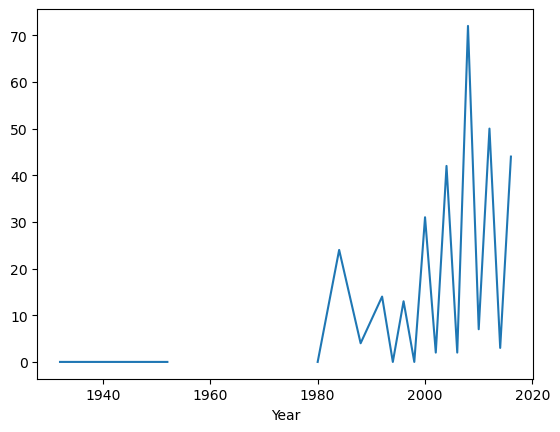

In [28]:
Cross_tab01.loc['China'].plot();

### 5. Athlete with most height

In [29]:
data.nlargest(1,'Height')

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
265040,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,0,0,0


### 6. Youngest player

In [30]:
data.nsmallest(1,'Age')

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
142882,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,0,0,1


### 7. Countries without female representatives

In [31]:
Gender_count = pd.crosstab(data.Sex,data.NOC)

In [32]:
Gender_count

NOC,AFG,AHO,ALB,ALG,AND,ANG,ANT,ANZ,ARG,ARM,ARU,ASA,AUS,AUT,AZE,BAH,BAN,BAR,BDI,BEL,BEN,BER,BHU,BIH,BIZ,BLR,BOH,BOL,BOT,BRA,BRN,BRU,BUL,BUR,CAF,CAM,CAN,CAY,CGO,CHA,CHI,CHN,CIV,CMR,COD,COK,COL,COM,CPV,CRC,CRO,CRT,CUB,CYP,CZE,DEN,DJI,DMA,DOM,ECU,EGY,ERI,ESA,ESP,EST,ETH,EUN,FIJ,FIN,FRA,FRG,FSM,GAB,GAM,GBR,GBS,GDR,GEO,GEQ,GER,GHA,GRE,GRN,GUA,GUI,GUM,GUY,HAI,HKG,HON,HUN,INA,IND,IOA,IRI,IRL,IRQ,ISL,ISR,ISV,ITA,IVB,JAM,JOR,JPN,KAZ,KEN,KGZ,KIR,KOR,KOS,KSA,KUW,LAO,LAT,LBA,LBR,LCA,LES,LIB,LIE,LTU,LUX,MAD,MAL,MAR,MAS,MAW,MDA,MDV,MEX,MGL,MHL,MKD,MLI,MLT,MNE,MON,MOZ,MRI,MTN,MYA,NAM,NBO,NCA,NED,NEP,NFL,NGR,NIG,NOR,NRU,NZL,OMA,PAK,PAN,PAR,PER,PHI,PLE,PLW,PNG,POL,POR,PRK,PUR,QAT,RHO,ROT,ROU,RSA,RUS,RWA,SAA,SAM,SCG,SEN,SEY,SGP,SKN,SLE,SLO,SMR,SOL,SOM,SRB,SRI,SSD,STP,SUD,SUI,SUR,SVK,SWE,SWZ,SYR,TAN,TCH,TGA,THA,TJK,TKM,TLS,TOG,TPE,TTO,TUN,TUR,TUV,UAE,UAR,UGA,UKR,UNK,URS,URU,USA,UZB,VAN,VEN,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,5,12,27,94,42,129,37,2,643,38,16,7,2749,1100,71,100,13,39,14,604,14,41,17,39,9,794,2,36,7,1148,31,2,1069,15,16,17,3563,12,35,10,118,2770,58,94,25,16,295,8,9,65,236,0,588,58,696,710,5,7,72,64,181,6,66,1439,221,92,326,67,992,2781,912,11,15,13,3277,8,931,72,11,2999,58,655,17,75,15,27,21,19,222,39,1748,136,241,29,49,283,7,129,207,57,2543,5,366,23,2779,549,159,54,3,1490,5,5,4,12,197,11,13,13,15,41,75,209,73,48,1,92,101,14,64,12,649,149,7,33,29,31,36,18,23,51,5,24,28,0,22,1924,24,0,309,10,1130,2,784,4,11,39,23,162,104,8,13,26,1751,280,396,167,7,1,5,1619,434,2189,20,7,12,58,77,23,129,17,27,414,17,9,5,139,44,1,6,10,1205,22,361,1985,8,17,21,905,10,214,16,22,5,11,408,80,95,251,2,7,0,42,1180,0,1590,62,5533,151,12,221,74,11,2,0,0,4,0,378,19,113
M,121,67,43,457,127,138,96,84,2654,183,26,30,4889,4041,212,274,42,180,25,3253,57,171,19,95,67,993,151,116,83,2700,95,8,2461,29,51,46,6170,71,70,31,807,2371,135,218,68,24,774,11,9,199,640,11,1891,167,1178,2860,33,12,205,213,1441,37,152,3874,655,286,538,165,4475,9977,2403,15,48,43,8979,13,1714,214,29,6831,301,2526,37,350,58,85,81,87,463,150,4859,276,1167,65,740,1042,225,498,458,237,8172,40,482,57,5665,880,613,173,8,2974,3,225,280,42,754,73,61,15,51,288,294,445,923,71,44,590,429,73,170,37,2231,401,7,51,63,87,58,179,55,93,24,87,49,2,107,3915,70,1,573,37,3830,11,1558,62,551,100,112,370,590,13,12,82,4456,1242,411,760,185,11,7,2786,1277,2954,36,86,51,263,316,88,220,25,87,697,164,18,27,253,102,2,9,97,4945,47,694,6354,59,139,140,3499,36,533,54,32,4,48,689,295,466,1105,5,137,123,218,1379,2,4095,514,13320,344,23,704,80,31,60,20,11,28,5,2205,164,198


In [33]:
Gender_count_01 =Gender_count.unstack().unstack()

In [34]:
Gender_count_01

Sex,F,M
NOC,,
AFG,5,121
AHO,12,67
ALB,27,43
ALG,94,457
AND,42,127
...,...,...
YEM,4,28
YMD,0,5
YUG,378,2205


In [35]:
Countries_without_female_players = Gender_count_01[Gender_count_01['F']==0]

In [36]:
Countries_without_female_players

Sex,F,M
NOC,,
CRT,0,11
NBO,0,2
NFL,0,1
UAR,0,123
UNK,0,2
WIF,0,20
YAR,0,11
YMD,0,5


### 8. Gold medalist in basketball event, 1992 summer olympics

In [38]:
data.query("Year == 1992 & Sport == 'Basketball' & Medal == 'Gold' & Sex == 'M'")

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
14656,Charles Wade Barkley,M,29.0,198.0,114.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
22150,Larry Joe Bird,M,35.0,205.0,100.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
58646,Clyde Austin Drexler,M,30.0,200.0,101.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
65566,Patrick Aloysius Ewing,M,29.0,213.0,109.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
109625,"Earvin ""Magic"" Johnson, Jr.",M,32.0,205.0,100.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
110517,Michael Jeffrey Jordan,M,29.0,198.0,90.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
130713,Christian Donald Laettner,M,22.0,211.0,107.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
147819,Karl Malone,M,29.0,205.0,116.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
165616,"Christopher Paul ""Chris"" Mullin",M,28.0,200.0,98.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0
189367,Scottie Maurice Pippen,M,26.0,200.0,102.0,United States,USA,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold,1,0,0


### 9. Age category wise medal count

In [40]:
Age_category_wise_medal_count = data.groupby(['Medal'])['Age'].value_counts()

In [42]:
Age_category_wise_medal_count.unstack().unstack().unstack()

Medal,Bronze,Gold,Silver
Age,,,
10.0,1.0,NaN,NaN
11.0,NaN,NaN,1.0
12.0,3.0,NaN,3.0
13.0,2.0,7.0,7.0
14.0,18.0,27.0,30.0
...,...,...,...
68.0,NaN,NaN,2.0
69.0,1.0,NaN,1.0
71.0,1.0,NaN,1.0


### 10. Oldest person who won gold medal

In [43]:
Gold = data.query("Medal == 'Gold'")

In [44]:
Gold_oldest = Gold[Gold['Age']==Gold.Age.max()]

In [45]:
Gold_oldest

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
105199,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,1,0,0
233390,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,1,0,0


### 11. Year in which most number of events

In [48]:
Most_events_year = pd.crosstab(data.Year,data.Event,margins=True)

In [50]:
Most_events_year.sort_values(by = 'All',ascending=False)

Event,Aeronautics Mixed Aeronautics,Alpine Skiing Men's Combined,Alpine Skiing Men's Downhill,Alpine Skiing Men's Giant Slalom,Alpine Skiing Men's Slalom,Alpine Skiing Men's Super G,Alpine Skiing Women's Combined,Alpine Skiing Women's Downhill,Alpine Skiing Women's Giant Slalom,Alpine Skiing Women's Slalom,Alpine Skiing Women's Super G,Alpinism Mixed Alpinism,"Archery Men's Au Chapelet, 33 metres","Archery Men's Au Chapelet, 50 metres","Archery Men's Au Cordon Dore, 33 metres","Archery Men's Au Cordon Dore, 50 metres",Archery Men's Championnat Du Monde,Archery Men's Continental Style,Archery Men's Double American Round,Archery Men's Double York Round,Archery Men's Individual,"Archery Men's Pole Archery, Large Birds, Individual","Archery Men's Pole Archery, Large Birds, Team","Archery Men's Pole Archery, Small Birds, Individual","Archery Men's Pole Archery, Small Birds, Team",Archery Men's Sur La Perche a La Herse,Archery Men's Sur La Perche a La Pyramide,"Archery Men's Target Archery, 28 metres, Individual","Archery Men's Target Archery, 28 metres, Team","Archery Men's Target Archery, 33 metres, Individual","Archery Men's Target Archery, 33 metres, Team","Archery Men's Target Archery, 50 metres, Individual","Archery Men's Target Archery, 50 metres, Team",Archery Men's Team,Archery Men's Team Round,Archery Men's Unknown Event,Archery Women's Double Columbia Round,Archery Women's Double National Round,Archery Women's Individual,Archery Women's Team,Archery Women's Team Round,Art Competitions Mixed Architecture,"Art Competitions Mixed Architecture, Architectural Designs","Art Competitions Mixed Architecture, Designs For Town Planning","Art Competitions Mixed Architecture, Unknown Event",Art Competitions Mixed Literature,"Art Competitions Mixed Literature, Dramatic Works","Art Competitions Mixed Literature, Epic Works","Art Competitions Mixed Literature, Lyric Works","Art Competitions Mixed Literature, Unknown Event",Art Competitions Mixed Music,"Art Competitions Mixed Music, Compositions For Orchestra","Art Competitions Mixed Music, Compositions For Solo Or Chorus","Art Competitions Mixed Music, Instrumental And Chamber","Art Competitions Mixed Music, Unknown Event","Art Competitions Mixed Music, Vocals",Art Competitions Mixed Painting,"Art Competitions Mixed Painting, Applied Arts","Art Competitions Mixed Painting, Drawings And Water Colors","Art Competitions Mixed Painting, Graphic Arts","Art Competitions Mixed Painting, Paintings","Art Competitions Mixed Painting, Unknown Event",Art Competitions Mixed Sculpturing,"Art Competitions Mixed Sculpturing, Medals","Art Competitions Mixed Sculpturing, Medals And Plaques","Art Competitions Mixed Sculpturing, Medals And Reliefs","Art Competitions Mixed Sculpturing, Reliefs","Art Competitions Mixed Sculpturing, Statues","Art Competitions Mixed Sculpturing, Unknown Event",Art Competitions Mixed Unknown Event,"Athletics Men's 1,500 metres","Athletics Men's 1,500 metres Walk","Athletics Men's 1,600 metres Medley Relay",Athletics Men's 10 kilometres Walk,Athletics Men's 10 mile Walk,"Athletics Men's 10,000 metres",Athletics Men's 100 metres,Athletics Men's 110 metres Hurdles,"Athletics Men's 2,500 metres Steeplechase","Athletics Men's 2,590 metres Steeplechase",Athletics Men's 20 kilometres Walk,Athletics Men's 200 metres,Athletics Men's 200 metres Hurdles,"Athletics Men's 3 mile, Team","Athletics Men's 3,000 metres Steeplechase","Athletics Men's 3,000 metres Walk","Athletics Men's 3,000 metres, Team","Athletics Men's 3,200 metres Steeplechase","Athletics Men's 3,500 metres Walk","Athletics Men's 4 mile, Team",Athletics Men's 4 x 100 metres Relay,Athletics Men's 4 x 400 metres Relay,"Athletics Men's 4,000 metres Steeplechase",Athletics Men's 400 metres,Athletics Men's 400 metres Hurdles,Athletics Men's 5 mile,"Athletics Men's 5,000 metres","Athletics Men's 5,000 metres, Team",Athletics Men's 50 kilometres Walk,Athletics Men's 56-pound Weight Throw,Athletics Men's 60 metres,Athletics Men's 80

### 12. Year wise count of participant countries

In [55]:
Yearly_participating_country_count = pd.crosstab(data.Year,data.NOC,margins=True)

In [56]:
Yearly_participating_country_count

NOC,AFG,AHO,ALB,ALG,AND,ANG,ANT,ANZ,ARG,ARM,ARU,ASA,AUS,AUT,AZE,BAH,BAN,BAR,BDI,BEL,BEN,BER,BHU,BIH,BIZ,BLR,BOH,BOL,BOT,BRA,BRN,BRU,BUL,BUR,CAF,CAM,CAN,CAY,CGO,CHA,CHI,CHN,CIV,CMR,COD,COK,COL,COM,CPV,CRC,CRO,CRT,CUB,CYP,CZE,DEN,DJI,DMA,DOM,ECU,EGY,ERI,ESA,ESP,EST,ETH,EUN,FIJ,FIN,FRA,FRG,FSM,GAB,GAM,GBR,GBS,GDR,GEO,GEQ,GER,GHA,GRE,GRN,GUA,GUI,GUM,GUY,HAI,HKG,HON,HUN,INA,IND,IOA,IRI,IRL,IRQ,ISL,ISR,ISV,ITA,IVB,JAM,JOR,JPN,KAZ,KEN,KGZ,KIR,KOR,KOS,KSA,KUW,LAO,LAT,LBA,LBR,LCA,LES,LIB,LIE,LTU,LUX,MAD,MAL,MAR,MAS,MAW,MDA,MDV,MEX,MGL,MHL,MKD,MLI,MLT,MNE,MON,MOZ,MRI,MTN,MYA,NAM,NBO,NCA,NED,NEP,NFL,NGR,NIG,NOR,NRU,NZL,OMA,PAK,PAN,PAR,PER,PHI,PLE,PLW,PNG,POL,POR,PRK,PUR,QAT,RHO,ROT,ROU,RSA,RUS,RWA,SAA,SAM,SCG,SEN,SEY,SGP,SKN,SLE,SLO,SMR,SOL,SOM,SRB,SRI,SSD,STP,SUD,SUI,SUR,SVK,SWE,SWZ,SYR,TAN,TCH,TGA,THA,TJK,TKM,TLS,TOG,TPE,TTO,TUN,TUR,TUV,UAE,UAR,UGA,UKR,UNK,URS,URU,USA,UZB,VAN,VEN,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM,All
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,0,0,5,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,25,0,0,0,0,94,0,148,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,380
1900,0,0,0,0,0,0,0,0,1,0,0,0,6,26,0,0,0,0,0,100,0,0,0,0,0,0,9,0,0,3,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,36,0,0,0,0,0,0,0,12,0,0,0,0,0,1071,0,0,0,0,146,0,0,0,0,103,0,4,0,0,0,0,0,4,0,0,34,0,5,0,1,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0,0,0,0,29,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,0,0,0,0,0,0,0,0,0,0,0,0,0,1936
1904,0,0,0,0,0,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,6,0,0,0,0,55,0,17,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1109,0,0,0,0,0,0,0,0,0,0,0,0,0,1301
1906,0,0,0,0,0,0,0,0,0,0,0,0,10,100,0,0,0,0,0,31,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,68,0,0,0,0,5,0,0,0,0,0,0,0,18,174,0,0,0,0,113,0,0,0,0,157,0,484,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,1733
1908,0,0,0,0,0,0,0,48,1,0,0,0,0,13,0,0,0,0,0,99,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,0,0,0,0,0,0,0,0,0,0,0,0,94,319,0,0,0,0,972,0,0,0,0,148,0,49,0,0,0,0,0,0,0,0,107,0,0,0,0,0,0,1,0,0,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,0,0,0,0,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,0,0,0,0,0,0,0,0,0,0,0,0,0,3101
1912,0,0,0,0,0,0,0,38,0,0,0,0,0,132,0,0,0,0,0,72,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,60,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,233,0,0,0,0,0,0,0,0,0,0,0,0,233,232,0,0,0,0,461,0,0,0,0,312,0,77,0,0,0,0,0,0,0,0,207,0,0,0,0,0,0,2,0,0,96,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0,0,0,263,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,0,0,56,266,0,0,0,0,0,0,0,0,0,0,0,0,

### 13. count of winter and summer olympics

In [57]:
summer = data[data['Season']=='Summer']
winter = data[data['Season']!='Summer']

In [58]:
len(summer),len(winter)

(222552, 48564)

### 14. Sport in which there is less events

In [59]:
Sport_with_less_events = pd.crosstab(data.Sport,data.Event,margins=True)

In [60]:
Sport_with_less_events.sort_values(by='All')

Event,Aeronautics Mixed Aeronautics,Alpine Skiing Men's Combined,Alpine Skiing Men's Downhill,Alpine Skiing Men's Giant Slalom,Alpine Skiing Men's Slalom,Alpine Skiing Men's Super G,Alpine Skiing Women's Combined,Alpine Skiing Women's Downhill,Alpine Skiing Women's Giant Slalom,Alpine Skiing Women's Slalom,Alpine Skiing Women's Super G,Alpinism Mixed Alpinism,"Archery Men's Au Chapelet, 33 metres","Archery Men's Au Chapelet, 50 metres","Archery Men's Au Cordon Dore, 33 metres","Archery Men's Au Cordon Dore, 50 metres",Archery Men's Championnat Du Monde,Archery Men's Continental Style,Archery Men's Double American Round,Archery Men's Double York Round,Archery Men's Individual,"Archery Men's Pole Archery, Large Birds, Individual","Archery Men's Pole Archery, Large Birds, Team","Archery Men's Pole Archery, Small Birds, Individual","Archery Men's Pole Archery, Small Birds, Team",Archery Men's Sur La Perche a La Herse,Archery Men's Sur La Perche a La Pyramide,"Archery Men's Target Archery, 28 metres, Individual","Archery Men's Target Archery, 28 metres, Team","Archery Men's Target Archery, 33 metres, Individual","Archery Men's Target Archery, 33 metres, Team","Archery Men's Target Archery, 50 metres, Individual","Archery Men's Target Archery, 50 metres, Team",Archery Men's Team,Archery Men's Team Round,Archery Men's Unknown Event,Archery Women's Double Columbia Round,Archery Women's Double National Round,Archery Women's Individual,Archery Women's Team,Archery Women's Team Round,Art Competitions Mixed Architecture,"Art Competitions Mixed Architecture, Architectural Designs","Art Competitions Mixed Architecture, Designs For Town Planning","Art Competitions Mixed Architecture, Unknown Event",Art Competitions Mixed Literature,"Art Competitions Mixed Literature, Dramatic Works","Art Competitions Mixed Literature, Epic Works","Art Competitions Mixed Literature, Lyric Works","Art Competitions Mixed Literature, Unknown Event",Art Competitions Mixed Music,"Art Competitions Mixed Music, Compositions For Orchestra","Art Competitions Mixed Music, Compositions For Solo Or Chorus","Art Competitions Mixed Music, Instrumental And Chamber","Art Competitions Mixed Music, Unknown Event","Art Competitions Mixed Music, Vocals",Art Competitions Mixed Painting,"Art Competitions Mixed Painting, Applied Arts","Art Competitions Mixed Painting, Drawings And Water Colors","Art Competitions Mixed Painting, Graphic Arts","Art Competitions Mixed Painting, Paintings","Art Competitions Mixed Painting, Unknown Event",Art Competitions Mixed Sculpturing,"Art Competitions Mixed Sculpturing, Medals","Art Competitions Mixed Sculpturing, Medals And Plaques","Art Competitions Mixed Sculpturing, Medals And Reliefs","Art Competitions Mixed Sculpturing, Reliefs","Art Competitions Mixed Sculpturing, Statues","Art Competitions Mixed Sculpturing, Unknown Event",Art Competitions Mixed Unknown Event,"Athletics Men's 1,500 metres","Athletics Men's 1,500 metres Walk","Athletics Men's 1,600 metres Medley Relay",Athletics Men's 10 kilometres Walk,Athletics Men's 10 mile Walk,"Athletics Men's 10,000 metres",Athletics Men's 100 metres,Athletics Men's 110 metres Hurdles,"Athletics Men's 2,500 metres Steeplechase","Athletics Men's 2,590 metres Steeplechase",Athletics Men's 20 kilometres Walk,Athletics Men's 200 metres,Athletics Men's 200 metres Hurdles,"Athletics Men's 3 mile, Team","Athletics Men's 3,000 metres Steeplechase","Athletics Men's 3,000 metres Walk","Athletics Men's 3,000 metres, Team","Athletics Men's 3,200 metres Steeplechase","Athletics Men's 3,500 metres Walk","Athletics Men's 4 mile, Team",Athletics Men's 4 x 100 metres Relay,Athletics Men's 4 x 400 metres Relay,"Athletics Men's 4,000 metres Steeplechase",Athletics Men's 400 metres,Athletics Men's 400 metres Hurdles,Athletics Men's 5 mile,"Athletics Men's 5,000 metres","Athletics Men's 5,000 metres, Team",Athletics Men's 50 kilometres Walk,Athletics Men's 56-pound Weight Throw,Athletics Men's 60 metres,Athletics Men's 80

### 15. Most occuring event

In [61]:
data.Event.value_counts()

Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 765, dtype: int64

### 16. USA's - Yearly medal count

In [62]:
USA = data[data['Team']=='United States']

In [63]:
pd.crosstab(USA.Year,USA.Medal)

Medal,Bronze,Gold,Silver
Year,,,
1896,2,11,7
1900,13,18,14
1904,66,65,68
1906,6,12,6
1908,15,34,16
1912,36,46,25
1920,38,111,45
1924,50,92,44
1928,19,48,25


### 17. Country with more medals and less number of players

In [64]:
team_and_medal_count = pd.crosstab(data.Team,data.Medal)

In [65]:
team_and_medal_count['Total'] = team_and_medal_count['Bronze']+team_and_medal_count['Silver']+team_and_medal_count['Gold']

In [66]:
team_and_medal_count

Medal,Bronze,Gold,Silver,Total
Team,,,,
A North American Team,4,0,0,4
Afghanistan,2,0,0,2
Algeria,8,5,4,17
Ali-Baba II,5,0,0,5
Amateur Athletic Association,0,5,0,5
...,...,...,...,...
Winnipeg Shamrocks-1,0,12,0,12
Yugoslavia,93,130,167,390
Zambia,1,0,1,2


In [67]:
len(team_and_medal_count)

498

#### Number of players in a Team

In [68]:
top_countries = data.Team.value_counts()

In [69]:
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

In [70]:
team_and_medal_count

Medal,Bronze,Gold,Silver,Total
Team,,,,
A North American Team,4,0,0,4
Afghanistan,2,0,0,2
Algeria,8,5,4,17
Ali-Baba II,5,0,0,5
Amateur Athletic Association,0,5,0,5
...,...,...,...,...
Winnipeg Shamrocks-1,0,12,0,12
Yugoslavia,93,130,167,390
Zambia,1,0,1,2


In [71]:
team_and_medal_count['Number_of_Players'] = top_countries

In [72]:
team_and_medal_count

Medal,Bronze,Gold,Silver,Total,Number_of_Players
Team,,,,,
A North American Team,4,0,0,4,4
Afghanistan,2,0,0,2,126
Algeria,8,5,4,17,551
Ali-Baba II,5,0,0,5,7
Amateur Athletic Association,0,5,0,5,5
...,...,...,...,...,...
Winnipeg Shamrocks-1,0,12,0,12,12
Yugoslavia,93,130,167,390,2558
Zambia,1,0,1,2,183


### 18. City with most number of olymipcs held

In [73]:
data.groupby(['City'])['Year'].value_counts()

City                    Year
Albertville             1992     3436
Amsterdam               1928     4992
Antwerpen               1920     4292
Athina                  2004    13443
                        1906     1733
                        1896      380
Atlanta                 1996    13780
Barcelona               1992    12977
Beijing                 2008    13602
Berlin                  1936     6506
Calgary                 1988     2639
Chamonix                1924      460
Cortina d'Ampezzo       1956     1307
Garmisch-Partenkirchen  1936      895
Grenoble                1968     1891
Helsinki                1952     8270
Innsbruck               1976     1861
                        1964     1778
Lake Placid             1980     1746
                        1932      352
Lillehammer             1994     3160
London                  2012    12920
                        1948     6405
                        1908     3101
Los Angeles             1984     9454
                     

### 19. Which are the newly added sports

Lets make 2 data frames : before 2016 and 2016. Then extract the events from it in lists, then
compare both the lists.

In [74]:
data2016 = data[data['Year'] == 2016]
data_not_2016 = data[data['Year']!= 2016]

In [76]:
list1 = list(data2016.Event)
list2 = list(data_not_2016.Event)

In [77]:
New_events = list(set(list1).difference(list2))
print(New_events)

["Rugby Sevens Men's Rugby Sevens", "Rugby Sevens Women's Rugby Sevens", "Wrestling Women's Light-Heavyweight, Freestyle", "Wrestling Women's Featherweight, Freestyle", "Sailing Women's Skiff"]


### 20. Second most country won bronze medal

In [78]:
Bronze = data.groupby(['Team'])['Bronze'].sum()

In [79]:
Bronze.sort_values(ascending=False)

Team
United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
                 ... 
Hb-20               0
Hb-24               0
Heidelberg          0
Heira II            0
rn-2                0
Name: Bronze, Length: 1184, dtype: int64

#### Germany is the contry having second place in the case of Bronze medals.